# <font color=green> <div align="center"> Анализ результатов A/B Теста </div> </font>

## Основная задача
Вместе с отделом маркетинга был подготовилен список гипотез для увеличения выручки крупного интернет-магащина. Необходимо риоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

## Данные
Заполнить!

## Шаги выполнения проекта
### [Часть 1. Приоритизация гипотез](#step1)
Приоритизировать гипотезы:

* Применить фреймворки ICE и RICE для приоритизации гипотез. Указать, как изменилась приоритизация гипотез после.
  
### [Часть 2. Анализ A/B-теста](#step2)
Проанализировать A/B-тест:
* Построить график кумулятивной выручки по группам.
* Построить график кумулятивного среднего чека по группам.
* Построить график относительного изменения кумулятивного среднего чека группы B к группе A.
* Построить график кумулятивной конверсии по группам.
* Построить график относительного изменения кумулятивной конверсии группы B к группе A.
* Построить точечный график количества заказов по пользователям.
* Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
* Построить точечный график стоимостей заказов.
* Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
* Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
* Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
* Принять решение по результатам теста и объясните его. Останавливать ли тест, фиксировать ли победу одной из групп.

# Какие выводы получили
<b><u>1. Гипотезы</u></b><p>
Предлагаю сконцентрироваться на методе приоритизации RICE, т.к. он включает в себя оценку охвата аудитории, которая столкнется с изменениями в случае, если новая фича будет запущена. Так, первой взять в работу следует гипотезу 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок), она опережает другие гипотезы в 2 и более раза по оценке RICE. Затем можно сконцентрироваться по порядку на 2, 0, 6, 8 и т.д. гипотезах.<p>
<b><u>2. Баги<p></u></b><p>
Были обнаружены 58 заказов, попавших в обе группы тестирований. Нужно проверить, были это асессоры или реальные пользователи. Если реальные, то починить проблему, которая привела к тому, что часть покупателей видела оба тестируемых формата.<p>
<b><u>3. Конверсия<p></u></b><p>
После очистки данных и удаления 48 аномалий тест Манна-Уитни показал значимые различия между группами (p-value = 0.004) на уровне доверительной вероятности 95%.Конверсия группы B выше конверсии группы A на 19.08 %. Результат намного лучше, чем на первоначальных данных! На конец месяц акумулятивная конверсия для группы B составил 2.7%, а для группы A - 2.25%.<p>
<b><u>4. Средний чек<p></u></b><p>
После очистки данных и удаления 48 аномалий тест Манна-Уитни не показал значимых различий между группами (p-value = 0.486) на уровне доверительной вероятности 95%. Несмотря на то, что к концу месяца кумулятивный средний чек, посчитанный на очищенных данных для группы B составил 6293 руб., а для группы A - 6145 руб, статистически эти различия не значимы. Средние чеки двух групп равны
0.486<p>
<b><u>5. Итог<p></u></b><p>
Тест можно останавливать, показатели конверсий стабилизировались на 6 день теста, а показатели среднего чека хоть и казались на первый взгляд стабильными, но различия между группами такие небольшие, что их видно только на графике (6293 руб. против 6145 руб), статистическая разница не установлена.<br>
С вероятностью 95% группа B лучше группы A по конверсии (различие в 19.08%) и не отличается по размеру среднего чека. Рост конверсии при изменениях группы B на 19% - прекрасный результат, даже если средний чек при этом не изменился. Стоит внедрить изменения, которые отражает группа B.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy import stats as st
import seaborn as sns
sns.set_style("ticks")
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['xtick.minor.visible'] = False

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

# Чтобы полностью прочитать названия гипотез
pd.set_option('max_colwidth', -1) 

hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [3]:
orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Пропусков нет, отлично. Типы верные.

In [5]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [6]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Пропусков нет. Типы корректные.

In [7]:
hypothesis.name = 'hypothesis'
orders.name = 'orders'
visitors.name = 'visitors'

for i in [hypothesis, orders, visitors]:
    if i.duplicated().sum() > 0:
        print('Дубликатов в таблице',i.name,":",i.duplicated().sum())
        i = i.drop_duplicates().reset_index(drop = True)
        print('Дубликаты удалены')
    else:
        print('Дубликаты в таблице', i.name,'отсутствуют')

Дубликаты в таблице hypothesis отсутствуют
Дубликаты в таблице orders отсутствуют
Дубликаты в таблице visitors отсутствуют


Загрузили данные. Колонки с датой были приведены к нужному формату. Дубликаты отсутствуют.

Перед началом A/B теста проверим группы на пересечение.

In [8]:
# Найдем пользоваталей, попавших в обе группы.
both_groups_ids = orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group > 1').index.to_list()

# Эти пользователи могли видеть разные версии сайта, разные предложения о скидках, что повлияло на их выбор товара. Также это могли
# быть асессоры. Поэтому, для чистоты эксперимента булет лучше удалить таких пользователей из датасета.
orders = orders.query('visitorId != @both_groups_ids')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null int64
group            1016 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [9]:
print('Были удалены:', len(both_groups_ids), 'заказов, попавших в обе группы тестирований')

Были удалены: 58 заказов, попавших в обе группы тестирований


## <a id='step1'> Часть 1. Приоритизация гипотез. </a>

Посмотрим, какие гипотезы мы будем приоритизировать

In [10]:
hypothesis['hypothesis'].value_counts()

Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    1
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей              1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Запустить собственную службу доставки, что сократит срок доставки заказов                                       1
Запустить акцию, дающую скидку на товар в день рождения                                                         1
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                                1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар             1
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличи

### <u>ICE</u>

Рассчитаем показатель ICE следующим образом:
$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [11]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(2)
hypothesis.sort_values('ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### <u>RICE</u>

Рассчитаем показатель RICE следующим образом:
$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [12]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values('RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### <u>Сравнение ICE и RICE</u>

Топ-5 важных гипотез с точки зрения подхода ICE следующий: <p>
1) 8 - Запустить акцию, дающую скидку на товар в день рождения (16.2 баллов).<br>
2) 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (13.33 баллов).<br>
3) 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (11.20 баллов).<br>
4) 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (8.00 баллов).<br>
5) 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (7.00 баллов).<br>
<p>
Применив метод RICE мы получили немного другой топ важных для внедрения гипотез:<p>
1) 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (112 баллов).<br>
2) 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (56 баллов).<br>
3) 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (40 баллов).<br>
4) 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (40 баллов).<br>
5) 8 - Запустить акцию, дающую скидку на товар в день рождения (16.2 балла).<br>
<p>
Можно выбрать гипотезы, входящие в первые строки топа значимых по ICE и топа значимых по RICE, однако мы бы сконцентрировалась на последнем методе: он включает в себя оценку охвата аудитории, которая столкнется с изменениями в случае, если новая фича будет запущена. Именно из-за этого параметра 8 гипотеза сместилась с 1 места на 5: приятные нововведения коснутся только именинников, которыми каждый из нас бывает раз в году.<p>
Поэтому, рекомендуем первой взять в работу гипотезу 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок), она опережает другие гипотезы в 2 и более раза по оценке RICE. Затем можно сконцентрироваться по порядку на 2, 0, 6, 8 и т.д. гипотезах.

## <a id='step1'> Часть 2. Анализ A/B-теста </a>

### 1. График кумулятивной выручки по группам.

In [13]:
# Создадим таблицу с уникальными датами, в которые проводился каждый из экспериментов
datesGroups = orders[['date','group']].drop_duplicates().sort_values(['date','group'])
datesGroups

,date,group
55,2019-08-01,A
66,2019-08-01,B
175,2019-08-02,A
173,2019-08-02,B
291,2019-08-03,A
...,...,...
533,2019-08-29,B
757,2019-08-30,A
690,2019-08-30,B
958,2019-08-31,A


In [14]:
# Посчитаем для каждой пары дата-группа в табоице заказов кумулятивное кол-во заказов, кумулятивное кол-во покупателей, 
# кумулятивную выручкку
ordersAggregated = datesGroups.apply(
                lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
                                'date' : 'max',
                                'group' : 'max',
                                'transactionId' : pd.Series.nunique,
                                'visitorId' : pd.Series.nunique,
                                'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [15]:
# Посчитаем для каждой пары дата-группа в табоице посещений кумулятивное кол-во посетителей
visitorsAggregated = datesGroups.apply(
            lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
                                'date' : 'max',
                                'group' : 'max',
                                'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [16]:
# Создадим таблицу, в которой объединимм данные по ordersAggregated и visitorsAggregated
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Разделим по группам А и B
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

cumulativeData

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772
...,...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708,0.028801
58,2019-08-30,A,460,437,3311413,18037,0.025503
59,2019-08-30,B,531,511,4955833,18198,0.029179
60,2019-08-31,A,468,445,3364656,18736,0.024979


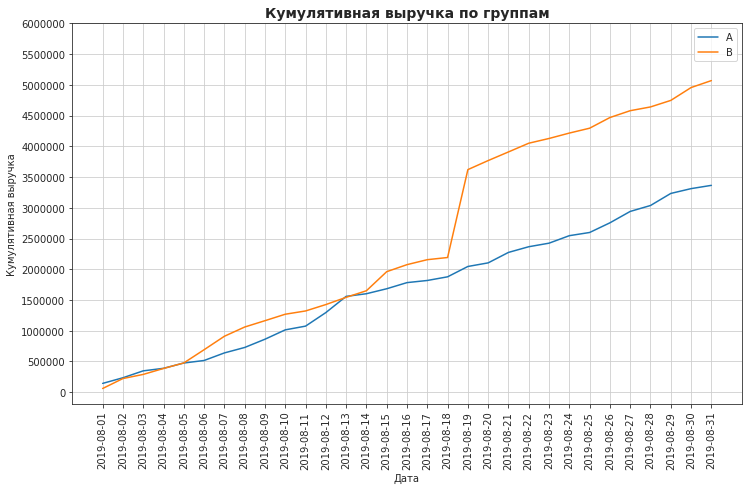

In [19]:
# Создадим таблицы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах А и B
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Построим график кумулятивной выручки по группам
plt.figure(figsize=(12,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам', weight='bold').set_fontsize('14')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.xticks(np.arange(cumulativeRevenueA['date'].min(), cumulativeRevenueA['date'].max() + pd.to_timedelta('1 day')
                     , pd.to_timedelta('1 day')), rotation = 90)
plt.yticks(np.arange(0, 6500000, 500000))
plt.legend() 
plt.show()

График иллюстрирует больший объем кумулятивной выручки в группе B по сравнению с группой A. К 31 августа в группе B она составила чуть больше 5 млн., в то время как в группе A сумма была чуть меньше 3.5 млн.<p>
Интересно, что с 18 по 19 августа кумулятивная выручка в группе B резко возросла с 2.2 млн. до 3.6 млн. Возможно, этому поспособствовал один очень дорогой и подозрительный заказ

### 2. График кумулятивного среднего чека по группам

In [20]:
#matplotlib.rcParams['axes.grid'] = True
#matplotlib.rcParams['xtick.minor.visible'] = False

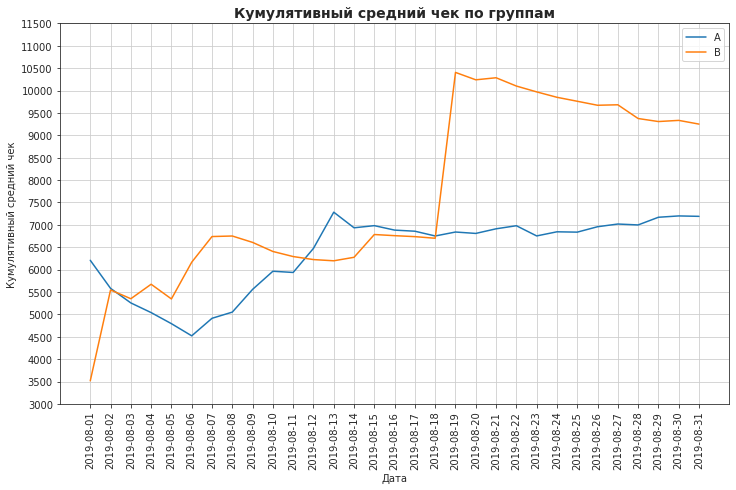

In [21]:
# Построим график среднего чека по группам (не кумулятивный)
#sns.set_style("ticks")
plt.figure(figsize=(12,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам', weight='bold').set_fontsize('14')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.xticks(np.arange(cumulativeRevenueA['date'].min(), cumulativeRevenueA['date'].max() + pd.to_timedelta('1 day')
                     , pd.to_timedelta('1 day')), rotation = 90)
plt.yticks(np.arange(3000, 12000, 500))
#plt.set_xticks(date_values)
#plt.set_xticklabels(date_values)
plt.legend()
plt.show()

Практически с первых дней группа B начала опережать группу A по среднему чеку. Стоит заметить, что с 12 по 18 августа наблюдалась обратная тенденция, однако затем средний чек группы B резко возрос, после чего последовало снижение, так называемое возвращение к "среднему". Всплеск совпадает с периодом, на который пришелся резкий подозрительный скачок кумулятивной выручки. К концу месяца этот средний чек составил 9250 в группе B и 7400 в группе A.

### 3. График относительного изменения кумулятивного среднего чека группы B к группе A.

In [ ]:
# Построим график относительного изменения кумулятивного среднего чека группы B к группе A
plt.figure(figsize=(12,7))
# Собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', 
                                                   right_on='date', how='left', suffixes=['A', 'B'])
# Строим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/
       mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='red', linestyle='--') 
plt.axhline(y=0.29, color='gray', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A.', weight='bold').set_fontsize('14')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение, %')
plt.yticks(np.arange(-0.5, 0.6, 0.1))
plt.xticks(np.arange(mergedCumulativeRevenue['date'].min(), mergedCumulativeRevenue['date'].max() + pd.to_timedelta('1 day')
                     , pd.to_timedelta('1 day')), rotation = 90)
plt.show()

Отношение кумулятивного среднего чека группы B к группе А практически весь месяц находилось выше отметки 0. Исключение составили дни с 12 по 18 августа. Самой высокой отметки в 52% группы достигли 19 августа, после чего относительное изменение кумулятивного среднего чека группы B к группе A начало плавно снижаться и к концу месяца составило 29%.

### 4. График кумулятивной конверсии по группам.

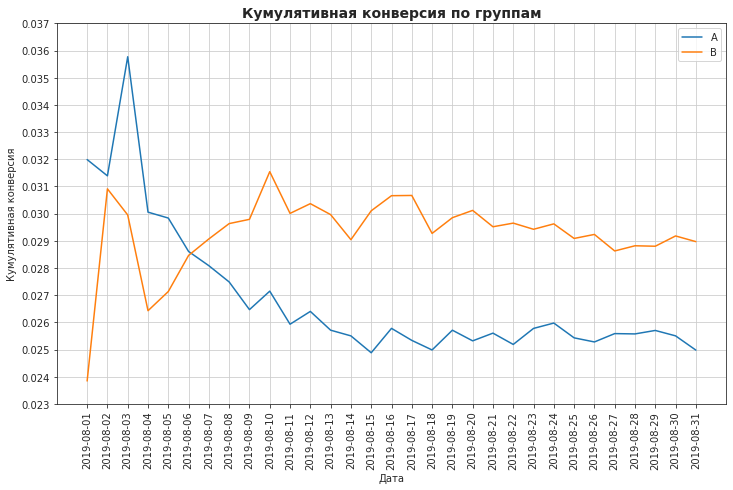

In [23]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Строим график кумулятивной конверсии по группам
plt.figure(figsize=(12,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия по группам', weight='bold').set_fontsize('14')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.yticks(np.arange(0.023,0.038, 0.001))
plt.xticks(np.arange(cumulativeRevenueA['date'].min(), cumulativeRevenueA['date'].max() + pd.to_timedelta('1 day')
                     , pd.to_timedelta('1 day')), rotation = 90)
plt.legend()
plt.show()

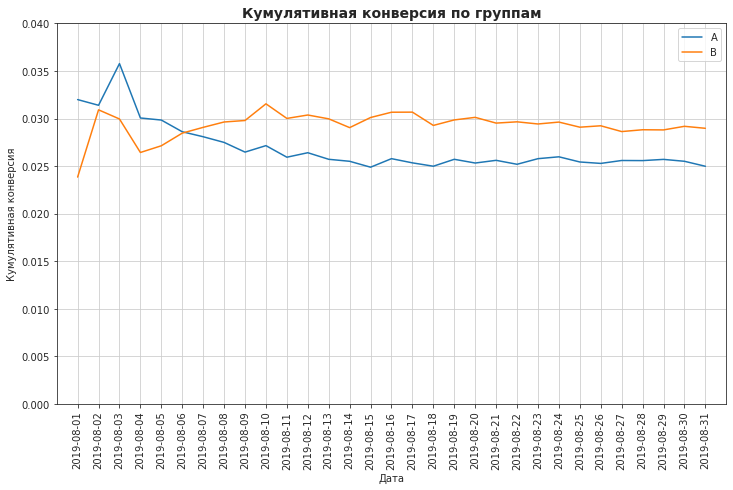

In [24]:
plt.figure(figsize=(12,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия по группам', weight='bold').set_fontsize('14')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
#plt.yticks(np.arange(0.029,0.038, 0.001))
plt.xticks(np.arange(cumulativeRevenueA['date'].min(), cumulativeRevenueA['date'].max() + pd.to_timedelta('1 day')
                     , pd.to_timedelta('1 day')), rotation = 90)
plt.axis(["2019-07-31", '2019-09-01', 0, 0.04])
plt.legend()
plt.show()

Кумулятивная конверсия была нестабильна в начале месяца: до 6 августа августа показатель был выше в группе A, после чего вплоть до конца месяца кумулятивная конверсия группы B была лучше аналогичного показателя группы A. Начиная с 9 августа показатели были относительно стабильны, хотя и наблюдалась тенденция к сближению графиков. К концу августа кумулятивная конверсия группы B находилась на отметке возле 2.9%, а кумулятивная конверсия группы A - чуть ниже 2.5%. Разница в 0.4%.

### 5. График относительного изменения кумулятивной конверсии группы B к группе A.

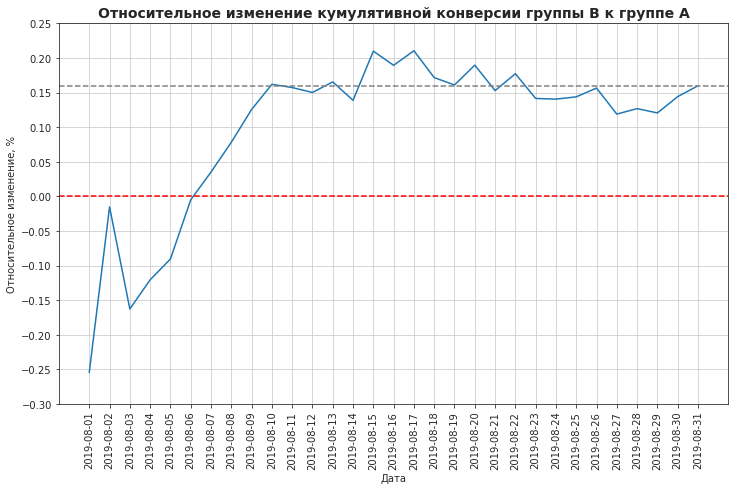

In [25]:
# Объелиняем таблицы с конверсиями
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
                                                left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# Строим график относительного изменения кумулятивной конверсии группы B к группе A
plt.figure(figsize=(12,7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A', weight='bold').set_fontsize('14')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение, %')
plt.yticks(np.arange(-0.3, 0.3, 0.05))
plt.xticks(np.arange(cumulativeRevenueA['date'].min(), cumulativeRevenueA['date'].max() + pd.to_timedelta('1 day')
                     , pd.to_timedelta('1 day')), rotation = 90)
plt.show()

График относительного изменения кумулятивной конверсии группы B к группе A более четко изображает тенденцию к медленному снижению различий между конверсиями в группах A и B. Тем не менее, пока отношение конверсий остается на уровне 16%.

### 6. График количества заказов по пользователям.

In [26]:
# Создаем таблицу с суммарным числом заказов по пользователям
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg(
                                                                                {'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']
ordersByUsers.sort_values(by='orders',ascending=False).tail()

,userId,orders
331,1438226485,1
332,1452540367,1
333,1455323168,1
334,1455861274,1
972,4283872382,1


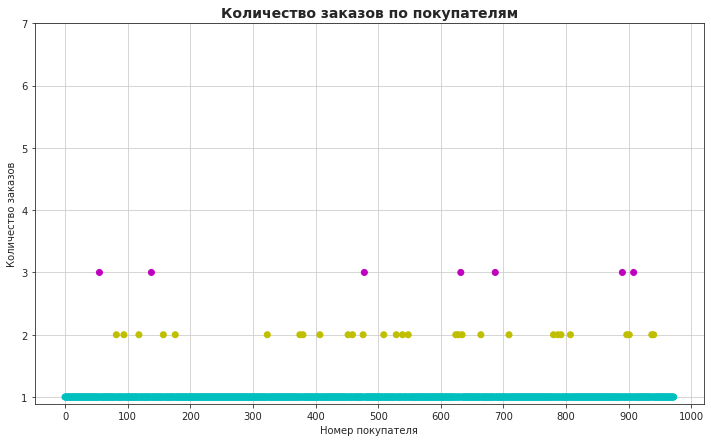

In [27]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values_norders = pd.Series(range(0,len(ordersByUsers)))

# Строим точечный график количества заказов по пользователям
plt.figure(figsize=(12,7))
# Цветами выделим выбивающиеся значения
col = np.where(ordersByUsers['orders']>=3,'m',np.where(ordersByUsers['orders']>=2,'y','c'))

plt.scatter(x_values_norders, ordersByUsers['orders'], c=col)
plt.title('Количество заказов по покупателям', weight='bold').set_fontsize('14')
plt.xlabel('Номер покупателя')
plt.ylabel('Количество заказов')
plt.xticks(np.arange(0,1030,100))
plt.yticks(np.arange(1,8,1))
plt.show()

Абсолютное большинство покупателей за август 2019 совершили только один заказ. Очень малое количество людей сделало 2 или 3 заказа. Считаю, будет лучше исключить эти выбивающиеся значения.

### 7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Определить границу для определения аномальных пользователей.

In [ ]:
print("95-перцентиль количество заказов на пользователя:", np.percentile(ordersByUsers['orders'], 95))
print("99-перцентиль количество заказов на пользователя:", np.percentile(ordersByUsers['orders'], 99))

In [ ]:
print('2 и более заказов: {:.2f}'.format(len(ordersByUsers.query('orders >=2'))/len(ordersByUsers)*100),'%')

Установим границу статистических выбросов в 1 заказ, это 99-перентиль количество заказов на пользователя и 3.7%0 наблюдений в выборке.

### 8. График стоимостей заказов.

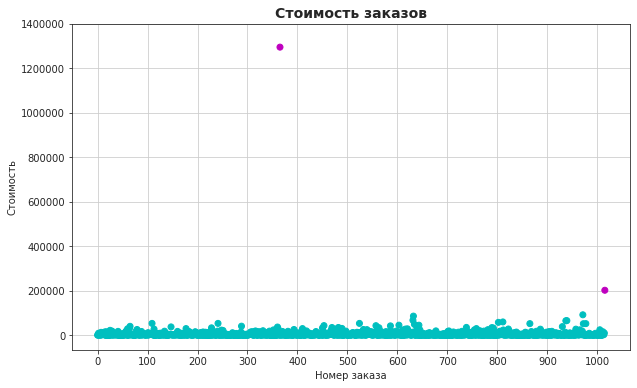

In [28]:
# серия из чисел от 0 до количества наблюдений в orders['revenue']
x_values_revenue = pd.Series(range(0,len(orders['revenue'])))

# Строим точечный график стоимостей заказов
plt.figure(figsize=(10,6))
# Цветами выделим выбивающиеся значения
col = np.where(orders['revenue']>=100000,'m','c')

plt.scatter(x_values_revenue, orders['revenue'], c=col)
plt.title('Стоимость заказов', weight='bold').set_fontsize('14')
plt.xlabel('Номер заказа')
plt.ylabel('Стоимость')
plt.xticks(np.arange(0,1030,100))
plt.yticks(np.arange(0,1600000,200000))
plt.show()

На первый взгляд всего пара заказов выбивалась из общей картины своей высокой стоимостью: это заказы ценой в 1.3млн и 200тыс.

### 9. Посчитать 95-й и 99-й перцентили стоимости заказов. Определить границу для определения аномальных заказов.

In [29]:
print("95-перцентиль стоимости заказов:", np.round(np.percentile(orders['revenue'], 95)))
print("99-перцентиль стоимости заказов:", np.round(np.percentile(orders['revenue'], 99)))

95-перцентиль стоимости заказов: 26785.0
99-перцентиль стоимости заказов: 53904.0


In [30]:
orders.query('revenue > 53904')

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
743,3603576309,4133034833,2019-08-09,67990,A
744,3668308183,888512513,2019-08-27,86620,B
940,2420050534,4003628586,2019-08-08,58550,B
949,1347999392,887908475,2019-08-21,60450,A
1099,316924019,148427295,2019-08-12,65710,A
1103,1348774318,1164614297,2019-08-12,66350,A
1136,666610489,1307669133,2019-08-13,92550,A
1196,3936777065,2108080724,2019-08-15,202740,B


Установим границу стоимости заказов в 53904 (99 перцентиль), это затронет 9 наблюдений.

### 10. Определить статистическую значимость различий в конверсии между группами по «сырым» данным.

In [31]:
# Создаем таблицы отдельно для групп A и B с числом посетителей в сутки
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [32]:
# Создаем таблицы отдельно для групп A и B с кумулятивным числом посетителей
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
                                                            {'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
                                                            {'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [33]:
# Создаем таблицы отдельно для групп A и B c числом заказов в день и выручкой
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049
3,2019-08-04,14,96890
4,2019-08-05,21,89908


In [34]:
# Создаем таблицы отдельно для групп A и B с кумулятивным числом заказов и кумулятивной выручкой
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


In [35]:
# Объединяем все созданные на этом шаге таблицы
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [36]:
# Теперь создаем таблицы отдельно для групп A и B с числом заказов по покупателям
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg(
                  {'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg(
                   {'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders'] 

ordersByUsersA.head()

,visitorId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [37]:
# Создадим таблицы отдельно для групп A и B, где пользователям будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(
                                                                ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(
                                                                ordersByUsersB['orders'])), name='orders')],axis=0)

sampleA.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Воспользуемся тестом Манна-Уитни, чтобы определить, есть ли существенные различия между независимыми выборками. Этот тест определяет, достаточно ли мала зона перекрещивающихся значений между двумя рядами (ранжированным рядом значений параметра в первой выборке и таким же во второй выборке). Чем меньше значение критерия, тем вероятнее, что различия между значениями параметра в выборках достоверны. В данном случае нас будет интересовать только значение p-value, которое позволит принять или отвергуть нулевую гипотезу.<br>
Ho - различий нет, принимается если p-value < 0.05 для уровня доверительной вероятности 95%.<br>
H1 - различия есть, принимается, если отвергается H1, то есть p-value должно быть < 0.05 для уровня доверительной вероятности 95%.

In [38]:
print("Тест Манна-Уитни по сырым данным, p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный прирост конверсии группы B к концерсии группы A по сырым данным: {0:.2f}".format(100*(sampleB.mean()/sampleA.mean()-1)), "%") 

Тест Манна-Уитни по сырым данным, p-value: 0.006
Относительный прирост конверсии группы B к концерсии группы A по сырым данным: 15.98 %



Тест Манна-Уитни по сырым данным можно считать значимым, т.к. p-value = 0.006, что меньше 0.05. Так, на уровне доверительной вероятности 95% конверсии групп значимо различаются между собой. Конверсия группы B выше конверсии группы A на 15.98%. Это хороший результат!

### 11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [39]:
print("Тест Манна-Уитни по сырым данным, p-value: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))
print("Относительный прирост среднего чека группы B по сырым данным: {0:.2f}".format((orders[orders['group']=='B']['revenue'].mean()/
                       orders[orders['group']=='A']['revenue'].mean()-1)*100), "%")

Тест Манна-Уитни по сырым данным, p-value: 0.415
Относительный прирост среднего чека группы B по сырым данным: 28.66 %


Хотя средний чек группы по B по сырым данным на первый взгляд и выше среднего чека группы A на 28.66 %, эти различия статистически не значимы на уровне доверительной вероятности 95% (p-value = 0.415). Должно быть, такие результаты получились из-за нестабильной динамики среднего чека в обеих группах.

### 12. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным.

In [40]:
# Запишем пользователей с аномальными значения в специальный датафреймы
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] >= 2]['visitorId'], ordersByUsersB[
                                                            ordersByUsersB['orders'] >= 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] >= 53904]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [41]:
print('Число пользователей с аномальными значениями:',len(abnormalUsers))

Число пользователей с аномальными значениями: 48


In [42]:
# Создадим датафреймы, не содержащие стат. выбросов
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders']
,pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders']
,pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [43]:
print("Тест Манна-Уитни по очищенным данным, p-value: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный прирост конверсии группы B по очищенным данным:{0:.2f}".format((sampleBFiltered.mean()/sampleAFiltered.mean()-1)*100), "%")

Тест Манна-Уитни по очищенным данным, p-value: 0.004
Относительный прирост конверсии группы B по очищенным данным:19.08 %


Тест Манна-Уитни по очищенным данным для конверсий также значим, p-value = 0.004, что меньше 0.05. Так, на уровне доверительной вероятности 95% конверсии групп на очищенных данных значимо различаются между собой. Конверсия группы B выше конверсии группы A на 19.08 %. Результат намного лучше, чем на первоначальных данных!

### 13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [44]:
print("Тест Манна-Уитни по очищенным данным, p-value: {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("Относительный прирост среднего чека группы B к группе A по очищенным данным: {0:.2f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1), "%") 

Тест Манна-Уитни по очищенным данным, p-value: 0.486
Относительный прирост среднего чека группы B к группе A по очищенным данным: 0.02 %


Для среднего чека даже на очищенных данных различия не значимы. Теперь правда относительный прирост среднего чека группы B к группе A по очищенным данным едва превышает 0% (на первоначальных данных он был 28.66%), но это не имеет значения, т.к. p-value сильно больше 0.05.

Поскольку в датасете visitors не содержатся уникальные идентификаторы пользователей, мы не сможем очистить эту таблицу от посещений пользователей, которых мы исключили в orders. Такие пользователи скорее всего посещали сайт не только в день заказа, но и раньше/ позже, поэтому лучше всего будет вообще не трогать этот датасет: корректно почистить его все равно невозможно, а так мы только исказим пропорции посетителей в разные дни, если удалим по одному посещению на каждого пользователя из abnormalUsers в день заказа. По этой причине займемся очисткой только базы orders.

In [45]:
# Посмотрим, на какие даты и группы пришлись стат выбросы
orders.query('visitorId in @abnormalUsers').groupby(['date','group']).agg({'visitorId' : 'nunique'})

visitorId
date       group           
2019-08-01 A      4        
2019-08-02 A      3        
           B      2        
2019-08-04 A      1        
           B      1        
2019-08-05 A      2        
2019-08-06 A      4        
           B      1        
2019-08-07 A      1        
           B      1        
2019-08-08 A      1        
           B      2        
2019-08-09 A      2        
           B      1        
2019-08-11 B      1        
2019-08-12 A      3        
           B      2        
2019-08-13 A      2        
           B      1        
2019-08-14 B      1        
2019-08-15 B      2        
2019-08-16 B      2        
2019-08-17 A      1        
           B      2        
2019-08-19 A      2        
           B      3        
2019-08-20 B      2        
2019-08-21 A      3        
           B      2        
2019-08-22 A      1        
           B      3        
2019-08-23 B      1        
2019-08-24 A      1        
           B      2        
2019-08-25 A      1        
2019-08-26 A      1        
           B      2        
2019-08-27 A      1        
           B      2        
2019-08-28 A      2        
           B      2        
2019-08-29 B      1        
2019-08-30 A      1

In [46]:
# Удалим их из базы очищенных данных
ordersAggregated_clean = datesGroups.apply(
                lambda x: orders.query('visitorId not in @abnormalUsers')
                    [np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
                                'date' : 'max',
                                'group' : 'max',
                                'transactionId' : pd.Series.nunique,
                                'visitorId' : pd.Series.nunique,
                                'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



## Убрать warning

In [47]:
# Создадим таблицу очищенных данных , в которой объединимм данные по ordersAggregated и visitorsAggregated
cumulativeData_clean = ordersAggregated_clean.merge(visitorsAggregated, left_on=['date', 'group'], 
                                              right_on=['date', 'group'])
cumulativeData_clean.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData_clean['conversion'] = cumulativeData_clean['orders']/cumulativeData_clean['visitors']

# Разделим по группам А и B
cumulativeDataA_clean = cumulativeData_clean[cumulativeData_clean['group']=='A']
cumulativeDataB_clean = cumulativeData_clean[cumulativeData_clean['group']=='B']

cumulativeDataA_clean.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,15,15,89858,719,0.020862
2,2019-08-02,A,30,30,136341,1338,0.022422
4,2019-08-03,A,54,54,248814,1845,0.029268
6,2019-08-04,A,64,64,289880,2562,0.024980
8,2019-08-05,A,84,84,369473,3318,0.025316


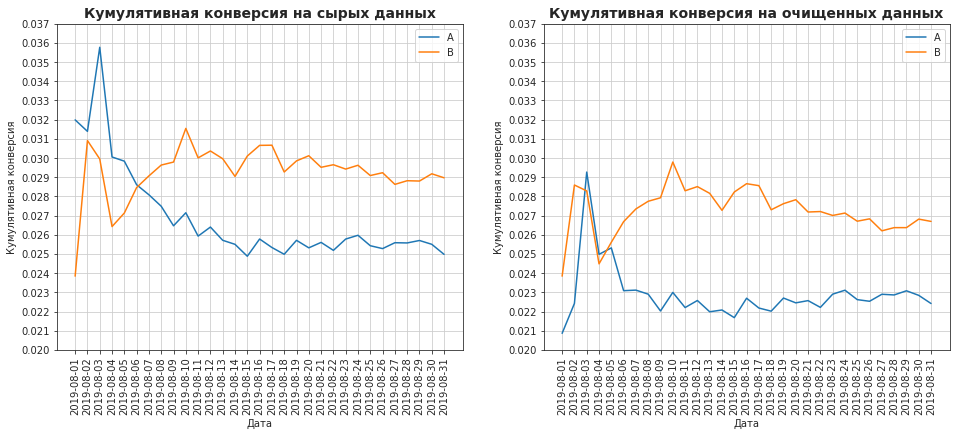

In [48]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(16, 6)
)

# Построим график кумулятивной конверсии по группам на очищенных данных
ax1.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
ax1.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
ax1.set_title('Кумулятивная конверсия на сырых данных', weight='bold').set_fontsize('14')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Кумулятивная конверсия')
ax1.set_yticks(np.arange(0.020,0.038, 0.001))
ax1.set_xticks(np.arange(cumulativeDataA['date'].min(), cumulativeDataA['date'].max() +
                     pd.to_timedelta('1 day'), pd.to_timedelta('1 day')))
ax1.xaxis.set_tick_params(rotation=90)
ax1.legend()

# Построим график кумулятивной конверсии по группам на очищенных данных
# Сохраним исходное форматирование осей для удобного сравнения с графиком по сырым данным
ax2.plot(cumulativeDataA_clean['date'], cumulativeDataA_clean['conversion'], label='A')
ax2.plot(cumulativeDataB_clean['date'], cumulativeDataB_clean['conversion'], label='B')
ax2.set_title('Кумулятивная конверсия на очищенных данных', weight='bold').set_fontsize('14')
ax2.set_xlabel('Дата')
ax2.set_ylabel('Кумулятивная конверсия')
ax2.set_yticks(np.arange(0.020,0.038, 0.001))
ax2.set_xticks(np.arange(cumulativeDataA_clean['date'].min(), cumulativeDataA_clean['date'].max() +
                     pd.to_timedelta('1 day'), pd.to_timedelta('1 day')))
ax2.xaxis.set_tick_params(rotation=90)
ax2.legend()

plt.show()

На графике кумулятивной конверсии по группам заметны несколько измененй. Группы A больше не опережает группу B в первые два дня исследования, а опережение 3-4 августа сведено к минимуму. Линии групп сильнее отдалены друг отдруга на очищенных данных, чем это было на сырых данных. В результате очистки снизились показатели кумулятивных конверсий на конец месяца. Для группы B он составил 2.7% вместо 2.9% ранее на сырых данных, и для группы A - 2.25% вместо 2.5% на сырых данных.

In [49]:
# Создадим таблицы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах А и B на очищенных данных
cumulativeRevenueA_clean = cumulativeData_clean[cumulativeData_clean['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB_clean = cumulativeData_clean[cumulativeData_clean['group']=='B'][['date','revenue', 'orders']]

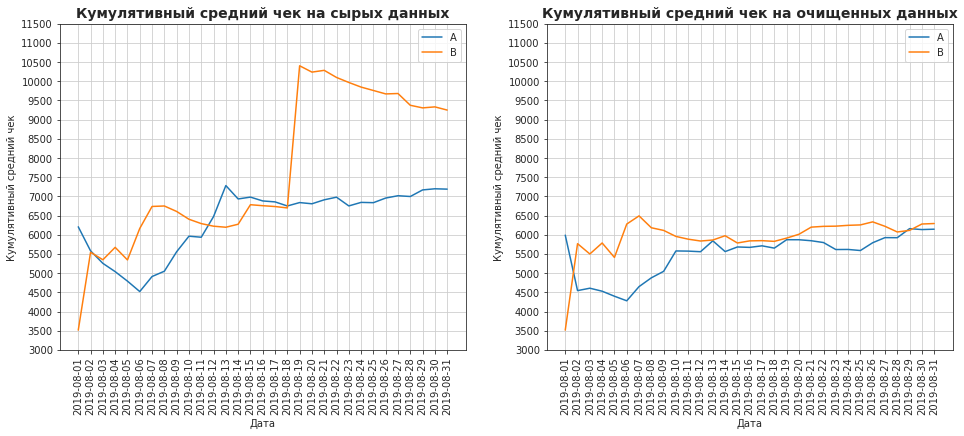

In [50]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(16, 6)
)

# Построим график кумулятивного среднего чека по группам на сырых данных
ax1.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders']
                                                                                                         , label='A')
ax1.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders']
                                                                                                         , label='B')
ax1.set_title('Кумулятивный средний чек на сырых данных', weight='bold').set_fontsize('14')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Кумулятивный средний чек')
ax1.set_yticks(np.arange(3000, 12000, 500))
ax1.set_xticks(np.arange(cumulativeRevenueA['date'].min(), cumulativeRevenueA['date'].max() 
                     + pd.to_timedelta('1 day'), pd.to_timedelta('1 day')))
ax1.xaxis.set_tick_params(rotation=90)
ax1.legend()

# Построим график кумулятивного среднего чека по группам на очищенных данных
# Сохраним исходное форматирование осей для удобного сравнения с графиком по сырым данным
ax2.plot(cumulativeRevenueA_clean['date'], cumulativeRevenueA_clean['revenue']/cumulativeRevenueA_clean['orders']
                                                                                                         , label='A')
ax2.plot(cumulativeRevenueB_clean['date'], cumulativeRevenueB_clean['revenue']/cumulativeRevenueB_clean['orders']
                                                                                                         , label='B')
ax2.set_title('Кумулятивный средний чек на очищенных данных', weight='bold').set_fontsize('14')
ax2.set_xlabel('Дата')
ax2.set_ylabel('Кумулятивный средний чек')
ax2.set_yticks(np.arange(3000, 12000, 500))
ax2.set_xticks(np.arange(cumulativeRevenueA_clean['date'].min(), cumulativeRevenueA_clean['date'].max() 
                     + pd.to_timedelta('1 day'), pd.to_timedelta('1 day')))
ax2.xaxis.set_tick_params(rotation=90)
ax2.legend()

plt.show()

График кумулятивного среднего чека заметно изменился. Во-первых, пропало опережение группой A в период с 13 по 18 августа. Во-вторых, исчезло аномальное повышение среднего чека в группе B, случившееся 19 августа. В-третьих, появилось еле заметное опережение в метрике группой A 29 августа. На конец месяца кумулятивный средний чек, посчитанный на очищенных данных для группы B снизился и составил 6293 руб. вместо 9250 руб. на сырых данных, а для группы A - 6145 руб. вместо 7189 руб. на сырых данных. 

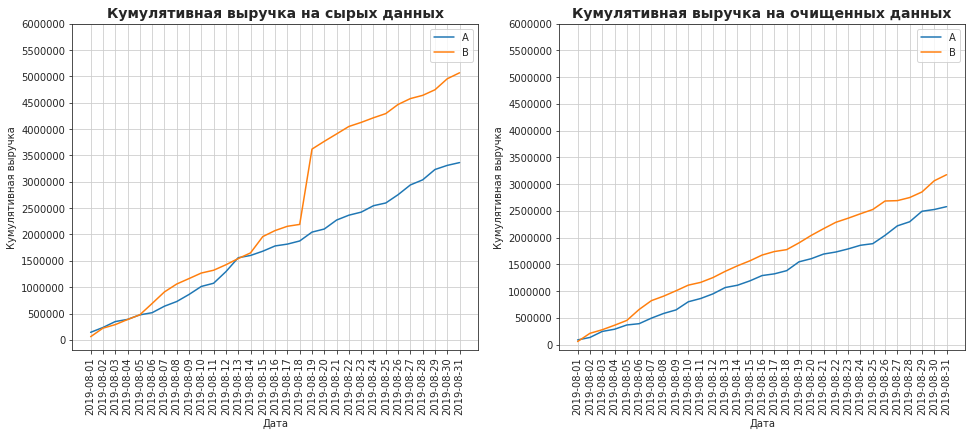

In [51]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(16, 6)
)

# Построим график кумулятивной выручки по группам на сырых данных
ax1.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
ax1.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
ax1.set_title('Кумулятивная выручка на сырых данных', weight='bold').set_fontsize('14')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Кумулятивная выручка')
ax1.set_yticks(np.arange(0, 6500000, 500000))
ax1.set_xticks(np.arange(cumulativeRevenueA['date'].min(), cumulativeRevenueA['date'].max() 
                     + pd.to_timedelta('1 day'), pd.to_timedelta('1 day')))
ax1.xaxis.set_tick_params(rotation=90)
ax1.legend() 


# Построим график кумулятивной выручки по группам на очищенных данных
# Сохраним исходное форматирование осей для удобного сравнения с графиком по сырым данным
ax2.plot(cumulativeRevenueA_clean['date'], cumulativeRevenueA_clean['revenue'], label='A')
ax2.plot(cumulativeRevenueB_clean['date'], cumulativeRevenueB_clean['revenue'], label='B')
ax2.set_title('Кумулятивная выручка на очищенных данных', weight='bold').set_fontsize('14')
ax2.set_xlabel('Дата')
ax2.set_ylabel('Кумулятивная выручка')
ax2.set_yticks(np.arange(0, 6500000, 500000))
ax2.set_xticks(np.arange(cumulativeRevenueA_clean['date'].min(), cumulativeRevenueA_clean['date'].max() 
                     + pd.to_timedelta('1 day'), pd.to_timedelta('1 day')))
ax2.xaxis.set_tick_params(rotation=90)
ax2.legend() 
plt.show()

График кумулятивной выручки по группам также изменился: 4-5 августа группа B не равняется с группой A в показателях, такжже не происходит краткого опережения группой A 13 августа и резкого скачка в показателе в группе B 19 августа. Теперь кумулятивная выручка в группе B стабильно выше кумулятивной выручки в группе A на протяжении всего месяца, за исключением первого дня исследования. Кроме того, к концу августа кумулятивная выручка в группах после очистки данных снизилась: теперь показатель группы B составил 3.2 млн вместо 5.1 и показатель группы A составил 2.6 млн вместо 3.4 млн.

Визуально заметно опережение в кумулятивной выручке группы B над группой A на очищенных данных, что не противоречит результату теста Манна-Уитни для конверсий, который показал превосходство группы B над группой A. Однако без статистической проверки о различиях говорить нельзя.

Так, после очистки данных от статистических выбросов заметно изменились графики по конверсии, среднему чеку и выручке. Строить выводы нужно на новых графиках.

### 14. Принять решение по результатам теста и объясните его. Останавливать ли тест, фиксировать ли победу одной из групп.

<font color='red'><b>Тест можно останавливать</b></font>, показатели конверсий стабилизировались на 6 день теста, а показатели среднего чека хоть и казались на первый взгляд стабильными, но различия между группами такие небольшие, что их видно только на графике (6293 руб. против 6145 руб), статистическая разница не установлена<p>
<font color='red'><b>С вероятностью 95% группа B лучше группы A по конверсии (различие в 19.08%) и не отличается по размеру среднего чека. Стоит внедрить изменения, которые отражает группа B.</b></font>

## Вывод



<b><u>1. Гипотезы</u></b><p>
Предлагаю сконцентрироваться на методе приоритизации RICE, т.к. он включает в себя оценку охвата аудитории, которая столкнется с изменениями в случае, если новая фича будет запущена. Так, первой взять в работу следует гипотезу 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок), она опережает другие гипотезы в 2 и более раза по оценке RICE. Затем можно сконцентрироваться по порядку на 2, 0, 6, 8 и т.д. гипотезах.<p>
<b><u>2. Баги<p></u></b><p>
Были обнаружены 58 заказов, попавших в обе группы тестирований. Нужно проверить, были это асессоры или реальные пользователи. Если реальные, то починить проблему, которая привела к тому, что часть покупателей видела оба тестируемых формата.<p>
<b><u>3. Конверсия<p></u></b><p>
После очистки данных и удаления 48 аномалий тест Манна-Уитни показал значимые различия между группами (p-value = 0.004) на уровне доверительной вероятности 95%.Конверсия группы B выше конверсии группы A на 19.08 %. Результат намного лучше, чем на первоначальных данных! На конец месяц акумулятивная конверсия для группы B составил 2.7%, а для группы A - 2.25%.<p>
<b><u>4. Средний чек<p></u></b><p>
После очистки данных и удаления 48 аномалий тест Манна-Уитни не показал значимых различий между группами (p-value = 0.486) на уровне доверительной вероятности 95%. Несмотря на то, что к концу месяца кумулятивный средний чек, посчитанный на очищенных данных для группы B составил 6293 руб., а для группы A - 6145 руб, статистически эти различия не значимы. Средние чеки двух групп равны
0.486<p>
<b><u>5. Итог<p></u></b><p>
Тест можно останавливать, показатели конверсий стабилизировались на 6 день теста, а показатели среднего чека хоть и казались на первый взгляд стабильными, но различия между группами такие небольшие, что их видно только на графике (6293 руб. против 6145 руб), статистическая разница не установлена.<br>
С вероятностью 95% группа B лучше группы A по конверсии (различие в 19.08%) и не отличаются по размеру среднего чека. Рост конверсии при изменениях группы B на 19% - прекрасный результат, даже если средний чек при этом не изменился. Стоит внедрить изменения, которые отражает группа B.